# STAT1100 Data Communication and Modelling

## Introduction to seaborn

[Seaborn](https://seaborn.pydata.org/) is a library for making statistical graphics in Python. It builds on top of [matplotlib](https://matplotlib.org/) and integrates closely with [pandas](https://pandas.pydata.org/) data structures.

We first import the pandas and seaborn libraries and apply the default theme.

In [1]:
import pandas as pd
import seaborn as sns

print(pd.__version__)
print(sns.__version__)

1.2.3
0.11.1


In [2]:
sns.set_theme()

The [set_theme()](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme) function [customises](https://matplotlib.org/stable/tutorials/introductory/customizing.html?highlight=matplotlibrc) how all matplotlib plots will look, even if they are not made with seaborn. Alternative themes are described [here](https://seaborn.pydata.org/tutorial/aesthetics.html).

Plot functions in seaborn are either "figure-level" or "axes-level" functions. Axes-level functions return a [matplotlib.axes](https://matplotlib.org/stable/api/axes_api.html) object while figure-level functions return a [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) object. Knowing which object is returned by the plotting function is important if we are wanting to customise the plot further. See the seaborn documentation [here](https://seaborn.pydata.org/tutorial/function_overview.html#figure-level-vs-axes-level-functions) for more information.

### Data sets

<a id='brainsize'></a>
#### Brain size

The `brainsize` data set is taken from Willerman, L., Schultz, R., Rutledge, J. N., and Bigler, E. (1991). In Vivo Brain Size and Intelligence, Intelligence, 15, 223-228.

The data are a sample of 40 right-handed university students (20 male and 20 female). Participants undertook the Wechsler Adult Intelligence Scale, resulting in three measurements: Full IQ, Verbal IQ, and Performance IQ. The researchers used Magnetic Resonance Imaging (MRI) to determine the brain size of the subjects (size was measured as total pixel count from the MRI scan). Information about gender and body size (height in inches and weight in pounds) are also included. The researchers withheld the weights of two subjects and the height of one subject for reasons of confidentiality.

In [3]:
brainsize = pd.read_csv("data/brainsize.csv")
brainsize.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


<a id='lowbwt'></a>
#### Low birthweight

The `lowbwt` data set is taken from Pagano, M. and Gavreau, K. Principles of Biostatistics (2nd edition).

The data are measurements on 100 low birthweight babies, including the baby’s score on the 5 minute Apgar test. The Apgar test was devised to provide an overall health summary of newborns. Newborns are given a score of 0, 1, or 2 (higher is better) on five criteria (colour, pulse rate, reflex, activity, respiration) yielding total scores of between 0 and 10. The Apgar score is usually recorded at one and five minutes. Scores 7 or higher are considered normal and scores below 3 are regarded as requiring immediate medical attention. 

A new variable called 'apgar5_cat' is created in which the newborns have been grouped by Apgar score into three levels: those with score between 0 and 3, those with score between 4 and 6, and those with normal scores 7 to 10. 

In [4]:
lowbwt = pd.read_stata("data/lowbwt_v15.dta")
bins = [-1, 3, 6, 10]
labels = ["Score 0-3", "Score 4-6", "Score 7-10"]
lowbwt["apgar5_cat"] = pd.cut(lowbwt["apgar5"], bins, labels=labels)
lowbwt.head()

,sbp,sex,tox,grmhem,gestage,apgar5,apgar5_cat
0,43.0,Male,No,No,29.0,7.0,Score 7-10
1,51.0,Male,No,No,31.0,8.0,Score 7-10
2,42.0,Female,No,No,33.0,0.0,Score 0-3
3,39.0,Female,No,No,31.0,8.0,Score 7-10
4,48.0,Female,Yes,No,30.0,7.0,Score 7-10


### Histograms

A simple histogram for the numerical variable `Height` from the [brainsize](#brainsize) data set can be produced using the [histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) function.

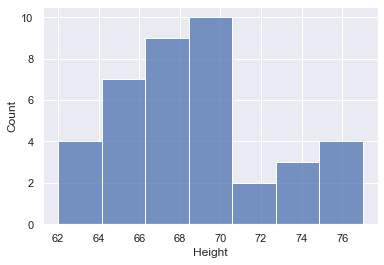

In [5]:
sns.histplot(data=brainsize, x="Height");

In a histogram, numeric data is arranged in increasing order and then divided into *bins* of equal width that cover the entire range of the data. The $y$-axis is then the frequency (count) or proportion (percentage) of observations within each bin.

The above histogram has seven bins. The default bin size is determined using a reference rule that depends on the sample size and variance. Increasing the number of bins generally produces a more detailed histogram but choosing a number of bins that is too small or too large is unhelpful for visualising the data distribution. The number of bins and the bin widths can be controlled by the parameters `bins` and `binwidth`.

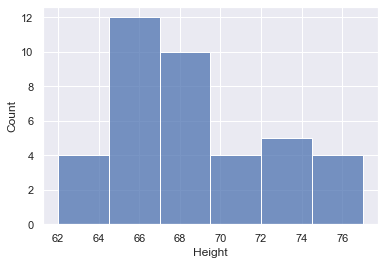

In [6]:
sns.histplot(data=brainsize, x="Height", bins=6);

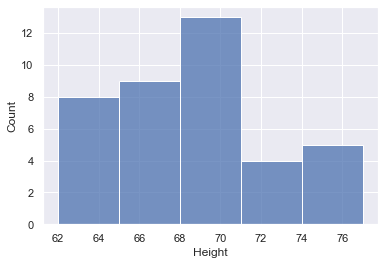

In [7]:
sns.histplot(data=brainsize, x="Height", binwidth=3);

Suppose that we want to create a histogram with 6 bins, each of width 3 starting from the height 60", we want the labels on the $x$-axis to align with the bin boundaries, and we want the label on the $y$-axis to read "Frequency".

First, we will make a list containing the bin boundaries using a [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) that we will assign to the `bins` parameter.

In [8]:
n_bins = 6
bin_start = 60
bin_width = 3
bins = [bin_start+bin_width*i for i in range(n_bins+1)]
print(bins)

[60, 63, 66, 69, 72, 75, 78]


Second, to make changes to the default axes we need access to the object returned by [histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot). Since [histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) is an axes-level function it returns a [matplotlib.axes](https://matplotlib.org/stable/api/axes_api.html) object. See the [matplotlib.axes](https://matplotlib.org/stable/api/axes_api.html) documentation for a complete list of methods that can be called to customise an axes-level plot.

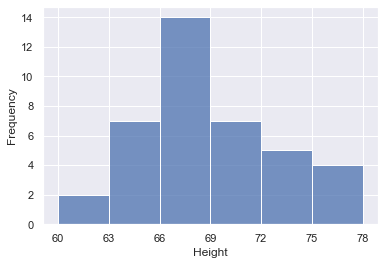

In [9]:
ax = sns.histplot(data=brainsize, x="Height", bins=bins)
ax.set_xticks(bins)
ax.set_ylabel("Frequency");

To create vertically-aligned histograms of the numerical variable `Height` by the categorical variable `Gender` we need to use the [displot()](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) function with parameters `row="Gender"` and `kind="hist"`. Since [displot()](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) is a figure-level function it returns a [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) object. See the [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) documentation for a complete list of methods that can be called to customise a figure-level plot.

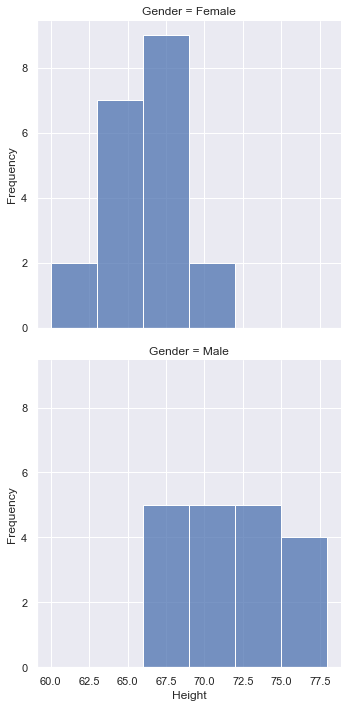

In [10]:
g = sns.displot(data=brainsize, x="Height", bins=bins, row="Gender", \
                kind="hist")
g.set_ylabels("Frequency");

### Boxplots

A boxplot (or box-and-whisker plot) is another useful plot for visualising the distribution of numerical data. In this plot, the box represents the middle 50% of the data, called the inter-quartile range (IQR). The left edge of the box is at the first quartile and the right edge of the box is at the third quartile. The vertical line in the middle of the box shows the median. The whiskers extend to points that lie within 1.5 IQRs of the first and third quartile. The endpoints of the whiskers are called (Tukey) *fences*. Any points outside this range are defined to be *outliers* and are displayed independently.

A simple boxplot for the numerical variable `Height` from the [brainsize](#brainsize) data set can be produced using the [boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) function and the parameter `x="Height"`. Since [boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) is an axes-level function it returns a [matplotlib.axes](https://matplotlib.org/stable/api/axes_api.html) object. 

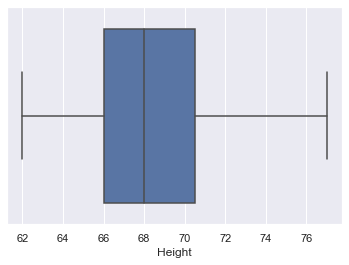

In [11]:
sns.boxplot(data=brainsize, x="Height");

The distribution of height is right skewed (positively skewed) because the mean is to the right of the median. Consequently, the box is not divided evenly by the median line, it is wider on the right, and the right whisker is longer. There are no outliers.

In [12]:
brainsize["Height"].describe()

count    39.000000
mean     68.525641
std       3.994649
min      62.000000
25%      66.000000
50%      68.000000
75%      70.500000
max      77.000000
Name: Height, dtype: float64

To create horizontally-aligned boxplots of the numerical variable `Height` by the categorical variable `Gender` we need to use the parameters `x="Gender"` and `y="Height"`.

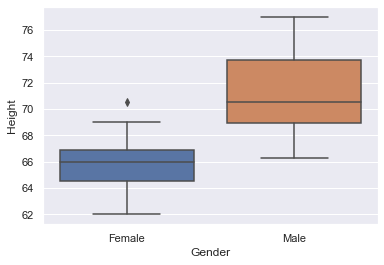

In [13]:
sns.boxplot(data=brainsize, x="Gender", y="Height");

The range and IQR of the distribution of height is wider for males compared to females thus the distribution for males has more variation. The distribution for males is also more skewed (right/positively). We can conclude that males are significantly taller on average than females because the boxes do not overlap.  There is one outlier in the distribution for females that is larger than the higher fence.

### Bar charts

Bar charts are usually used for displaying counts (or other statistics) by a categorical variable.

The bar chart below shows the number of infants by Apgar category. This is a visualisation of the frequency distribution.
A simple bar chart for the categorical variable `apgar5_cat` from the [lowbwt](#lowbwt) data set can be produced using the [countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) function and the parameter `x="apgar5_cat"`. Since [countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) is an axes-level function it returns a [matplotlib.axes](https://matplotlib.org/stable/api/axes_api.html) object.

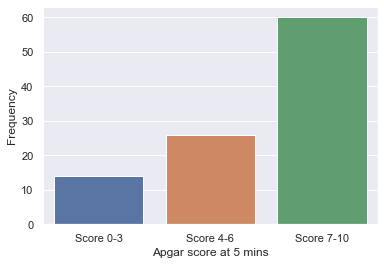

In [14]:
ax = sns.countplot(data=lowbwt, x="apgar5_cat")
ax.set_ylabel("Frequency")
ax.set_xlabel("Apgar score at 5 mins");

To plot the number of newborns in each Apgar category by whether or not they had a germinal matrix hemorrhage (GMH) we need to use the parameter `hue="grmhem"`.

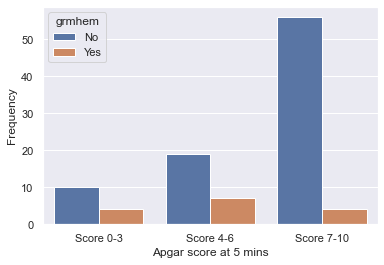

In [15]:
ax = sns.countplot(data=lowbwt, x="apgar5_cat", hue="grmhem")
ax.set_ylabel("Frequency")
ax.set_xlabel("Apgar score at 5 mins");

Seaborn doesn't support stacked bar charts so instead we use the pandas [DataFrame.plot.bar](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html) function. However, before we can use this function we need to create a contingency table of the `apgar5_cat` variable versus the `grmhem` variable using the pandas [crosstab()](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) function.

In [16]:
df = pd.crosstab(lowbwt["apgar5_cat"], lowbwt["grmhem"])
df

grmhem,No,Yes
apgar5_cat,,
Score 0-3,10,4
Score 4-6,19,7
Score 7-10,56,4


We can then recreate the above seaborn bar chart in pandas. Notice that the pandas plot adopts the seaborn theme that was specified using the [set_theme()](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme) function, although their aesthetics are not exactly the same.

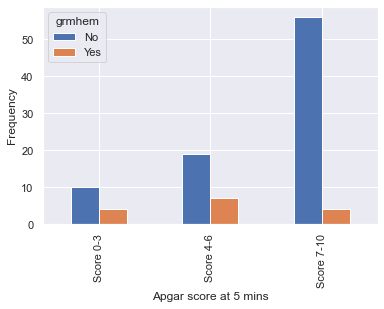

In [17]:
ax = df.plot.bar()
ax.set_xlabel("Apgar score at 5 mins")
ax.set_ylabel("Frequency");

For a stacked bar chart we use the `stacked=True` parameter.

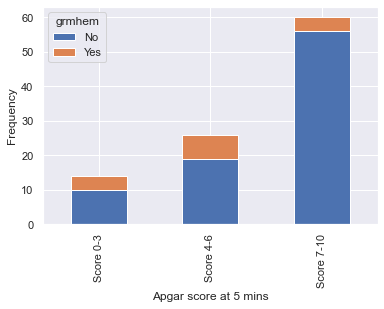

In [18]:
ax = df.plot.bar(stacked=True)
ax.set_xlabel("Apgar score at 5 mins")
ax.set_ylabel("Frequency");

For a percent stacked bar chart we need a contingency table of row percentages which we can get using the `normalize="index"` parameter.

In [19]:
df = pd.crosstab(lowbwt["apgar5_cat"], lowbwt["grmhem"], normalize="index")
df

grmhem,No,Yes
apgar5_cat,,
Score 0-3,0.714286,0.285714
Score 4-6,0.730769,0.269231
Score 7-10,0.933333,0.066667


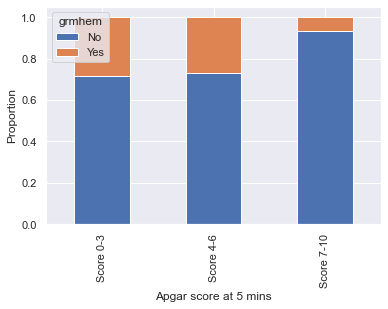

In [20]:
ax = df.plot.bar(stacked=True)
ax.set_xlabel("Apgar score at 5 mins")
ax.set_ylabel("Proportion");

### Scatterplots

A scatterplot is a visualisation of the relationship between two numeric variables where each observation is represented by a *dot* in a 2-dimensional plane. Scatterplots are a useful for visually assessing the correlation between variables. If the dots are scattered in a linear pattern with large voids this would indicate the correlation coefficient $r$ is closer to 1 in absolute value. If the dots are scattered loosely this would indicate $r$ is closer to 0.

Non-linear relationships are also apparent in a scatterplot. Remember also that the correlation coefficient $r$ is a measure of the linear relationship; a set of data could follow a perfect non-linear relationship but have a low correlation coefficient so it would be incorrect to conclude that the data aren't related just because $r$ is low.

Peoples' height and weight are positively correlated: taller people tend to be heavier. However, the range of weights for people of a given height do vary and it is certainly possible for a particular short person to weigh more than a particular tall person. So to what extent does height determine weight? We also know that, on average, men tend to be taller and heavier than women are. So to what extent does height explain the variation in weight, after controlling for gender?

A simple scatterplot for the numerical variables `Weight` versus `Height` from the [brainsize](#brainsize) data set can be produced using the [scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) function and the parameters `x="Height"` and `y="Weight"`. Since [scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) is an axes-level function it returns a [matplotlib.axes](https://matplotlib.org/stable/api/axes_api.html) object.

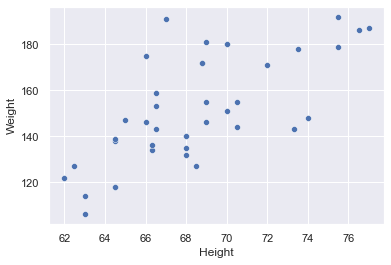

In [21]:
sns.scatterplot(data=brainsize, x="Height", y="Weight");

We can group the data by gender using the parameter `hue="Gender"`.

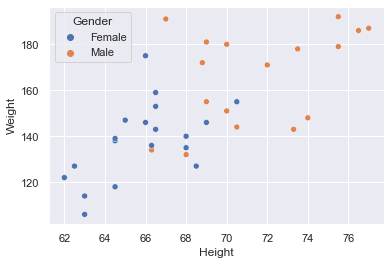

In [22]:
sns.scatterplot(data=brainsize, x="Height", y="Weight", hue="Gender");

We can see that the markers for males are clustered towards the top right and the markers for females are clustered more towards the bottom left. However, both scatter patterns exhibit a positive association.

To add a line of best fit for each gender we need to use the [lmplot()](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot) function. The [lmplot()](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot) function is a figure-level function and so returns a [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) object.

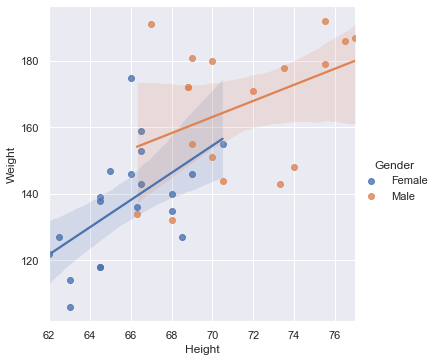

In [23]:
sns.lmplot(data=brainsize, x="Height", y="Weight", hue="Gender");

Fitting lines by group can tell us whether the groups vary differently. In other words, is the relationship between height and weight different for men and women? Whether there is a group difference, is determined by comparing the gradients of the lines: if the lines are parallel or similar in gradient, then there is no difference between the groups.

If we want vertically- or horizontally-aligned plots by gender then we can use the [relplot()](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) function with the parameters `col="Gender"` or `row="Gender"`. The [relplot()](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) function is a figure-level function and so returns a [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) object.

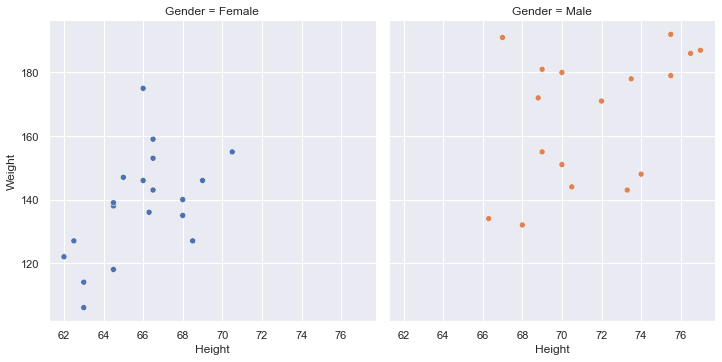

In [24]:
sns.relplot(data=brainsize, x="Height", y="Weight", hue="Gender", \
            col="Gender", legend=False);

 Alternatively we can use the [lmplot()](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot) function.

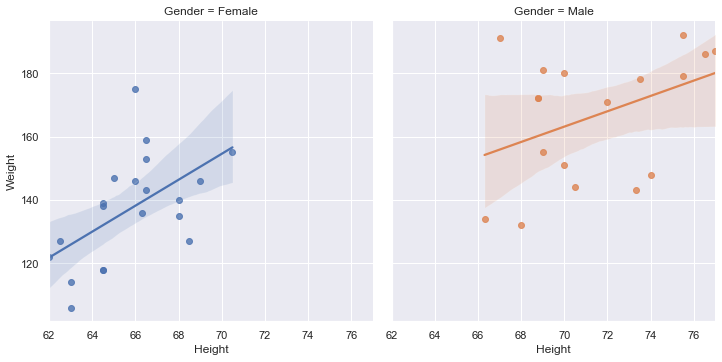

In [25]:
sns.lmplot(data=brainsize, x="Height", y="Weight", hue="Gender", col="Gender");

### Saving seaborn plots to file



To save an axes-level plot to a file we need access to the [matplotlib.axes](https://matplotlib.org/stable/api/axes_api.html) object and call the `savefig()` method of the `figure` attribute.

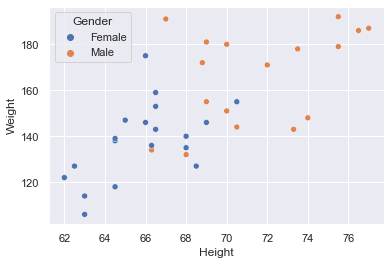

In [26]:
ax = sns.scatterplot(data=brainsize, x="Height", y="Weight", hue="Gender")
ax.figure.savefig("axes-level_plot.png")

To save a figure-level plot to a file we need access to the [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) object and call the `savefig()` method.

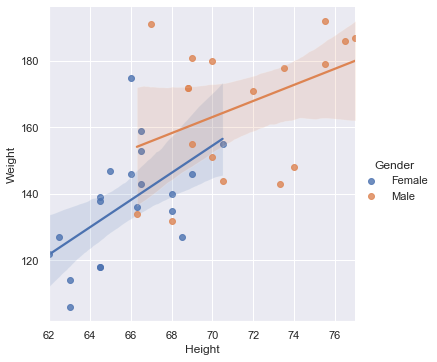

In [27]:
p = sns.lmplot(data=brainsize, x="Height", y="Weight", hue="Gender")
p.savefig("figure-level_plot.png")